# Lecture 9 - Neural Networks

Neural networks are a class of machine learning models inspired by the human brain. They consist of layers of neurons (nodes) that process information in a hierarchical manner.

## Structure of a Neural Network

A basic neural network consists of:

1. **Input Layer**: Takes input features (e.g., numerical values, images, text).
2. **Hidden Layers**: Perform computations using weights and activation functions.
3. **Output Layer**: Produces the final prediction or classification.

```mermaid
graph TD;
    A[Input Layer] --> B1(Hidden Layer 1);
    A --> B2(Hidden Layer 2);
    B1 --> C[Output Layer];
    B2 --> C;
```

## How Neural Networks Work

Each neuron in a hidden layer computes a weighted sum of inputs and applies an **activation function** (e.g., ReLU, sigmoid, softmax). Mathematically, this is:

$$ y = f\left( \sum_{i} w_i x_i + b \right)$$
Where:
- $ w_i $ are the weights,
- $ x_i $ are the inputs,
- $ b $ is the bias term,
- $ f $ is the activation function.

### Activation Functions

Different activation functions introduce non-linearity, allowing neural networks to learn complex patterns.

| Activation Function | Formula | Graph |
|---------------------|---------|-------|
| Sigmoid | $ \sigma(x) = \frac{1}{1+e^{-x}} $ | ![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/200px-Logistic-curve.svg.png) |
| ReLU | $ f(x) = \max(0, x) $ | ![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/ReLU_and_GELU.svg/200px-ReLU_and_GELU.svg.png) |
| Softmax | $ \sigma(x)_i = \frac{e^{x_i}}{\sum_j e^{x_j}} $ | Used for classification |

## Training a Neural Network

Neural networks are trained using **backpropagation**, which involves:

1. **Forward Propagation**: Compute the output given inputs.
2. **Loss Calculation**: Compare predictions with actual values using a loss function.
3. **Backward Propagation**: Compute gradients of weights using chain rule (Gradient Descent).
4. **Weight Update**: Adjust weights to minimize error.

```mermaid
sequenceDiagram
    participant Input as Input Layer
    participant Hidden as Hidden Layers
    participant Output as Output Layer
    participant Loss as Loss Function
    participant Update as Backpropagation

    Input->>Hidden: Forward propagation
    Hidden->>Output: Compute predictions
    Output->>Loss: Compute loss
    Loss->>Update: Backpropagation updates weights
    Update->>Hidden: Adjust weights
```

## Applications of Neural Networks

Neural networks power many modern AI systems:

- **Computer Vision**: Image classification, object detection (CNNs)
- **Natural Language Processing**: Chatbots, language translation (RNNs, Transformers)
- **Healthcare**: Disease diagnosis, drug discovery
- **Finance**: Fraud detection, stock price prediction

## Summary

Neural networks learn complex patterns from data by adjusting weights through backpropagation. With architectures like CNNs for images and Transformers for language, they form the backbone of modern AI.

---

🧠 **Key Takeaways**  
✅ Neural networks mimic human brain neurons.  
✅ Activation functions add non-linearity.  
✅ Training involves forward propagation, loss calculation, and backpropagation.  
✅ Used in vision, NLP, healthcare, and finance.


# Applying Neural Networks to the California Housing Dataset using PyTorch

## Goal

The goal of this project is to **predict housing prices** in California using a neural network. The dataset contains various features such as median income, population, and house age. To improve learning, we preprocess the data by:

- **Converting housing_median_age to categorical data**  
- **Replacing longitude and latitude with K-Means cluster labels**  
- **Removing missing values**

We will implement and train a neural network using **PyTorch** to predict **median_house_value**.

---

## Introduction to PyTorch

[PyTorch](https://pytorch.org/) is a popular open-source deep learning framework that provides flexibility, speed, and ease of use for machine learning models. It is widely used in research and production due to its **dynamic computation graph** and **automatic differentiation**.

### 🔹 Why Use PyTorch?
✅ Dynamic computational graph for flexibility  
✅ Strong GPU acceleration  
✅ Auto-differentiation (`torch.autograd`) for backpropagation  
✅ Rich ecosystem with support for data loading (`torch.utils.data`), neural network layers (`torch.nn`), and optimization (`torch.optim`)

---

## Machine Learning Pipeline

### Step 1: **Data Preprocessing**
Before training, the dataset is cleaned and transformed:
1. Convert **housing_median_age** into categorical bins.
2. Replace **longitude** and **latitude** with **K-Means cluster labels**.
3. Drop missing values to ensure clean inputs.
4. Normalize numerical features for better training stability.

---

### Step 2: **Building the Neural Network**
A feedforward neural network is designed with:
- **Fully connected layers (`torch.nn.Linear`)**
- **ReLU activation functions (`torch.nn.ReLU`)**
- **Mean Squared Error (MSE) loss for regression tasks**

---

### Step 3: **Training the Model**
The training process of any ML model generally consists of:
1. **Forward Pass**: The input data is passed through the network to obtain predictions.
2. **Loss Calculation**: A loss function measures how far predictions are from actual values.
3. **Backward Pass (Backpropagation)**: The gradients of weights are computed using automatic differentiation.
4. **Optimization Step**: An optimizer updates the model parameters to minimize the loss.

This process is repeated for multiple epochs to improve accuracy.

---

### Step 4: **Evaluation**
Once trained, the model is tested on unseen data using metrics such as **Root Mean Squared Error (RMSE)** to assess its performance.

---

## Summary

📌 **Key Takeaways**  
✅ **Data Preprocessing**: Convert categorical variables, replace location with clusters, and clean missing values.  
✅ **Neural Network with PyTorch**: Uses layers, activations, and optimizers to learn patterns in data.  
✅ **Training Process**: Forward pass → Loss computation → Backpropagation → Optimization.  
✅ **Evaluation**: Measure accuracy using RMSE.  

This pipeline provides a solid foundation for **housing price prediction** using **deep learning**! 🏡📊🚀


In [1]:
import pandas as pd
df = pd.read_csv("~/Arman/Teaching/TUMS2025/data/processed_data.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              20433 non-null  int64  
 1   housing_median_age      20433 non-null  float64
 2   total_rooms             20433 non-null  float64
 3   total_bedrooms          20433 non-null  float64
 4   population              20433 non-null  float64
 5   households              20433 non-null  float64
 6   median_income           20433 non-null  float64
 7   median_house_value      20433 non-null  float64
 8   ocean_proximity         20433 non-null  object 
 9   housing_median_age_cat  20433 non-null  object 
 10  location_cluster        20433 non-null  int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 1.7+ MB
None


,Unnamed: 0,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,housing_median_age_cat,location_cluster
0,0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,40-50,5
1,1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,20-30,5
2,2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,50+,5
3,3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,50+,5
4,4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,50+,5


In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
# Define categorical and numerical columns
categorical_features = ["housing_median_age_cat", "location_cluster"]
numerical_features = ["median_income", "total_rooms", "total_bedrooms", "population", "households"]

# Define transformers
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(), categorical_features),
    ("num", StandardScaler(), numerical_features)
])
preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 ['housing_median_age_cat',
                                  'location_cluster']),
                                ('num', StandardScaler(),
                                 ['median_income', 'total_rooms',
                                  'total_bedrooms', 'population',
                                  'households'])])

In [3]:
import torch
# Drop target column from input features
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"].values.reshape(-1, 1)  # Keep target variable

# Apply transformations
X_transformed = preprocessor.fit_transform(X)

# Scale the target variable
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_transformed, dtype=torch.float32)  # Convert sparse matrix to dense
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)  # Scaled target

print("Feature tensor shape:", X_tensor.shape)  # (num_samples, num_features)
print("Target tensor shape:", y_tensor.shape)  # (num_samples, 1)

Feature tensor shape: torch.Size([20433, 21])
Target tensor shape: torch.Size([20433, 1])


In [4]:
# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move tensors to device
X_tensor, y_tensor = X_tensor.to(device), y_tensor.to(device)


In [5]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [6]:
# Define neural network model
import torch.nn as nn
class HousingNN(nn.Module):
    def __init__(self, input_dim):
        super(HousingNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 8),
            nn.ReLU(),
            nn.Linear(8, 1)  # Regression output
        )

    def forward(self, x):
        return self.model(x)

In [7]:
# Instantiate model
input_dim = X_train.shape[1]
model = HousingNN(input_dim).to(device)
model.parameters

<bound method Module.parameters of HousingNN(
  (model): Sequential(
    (0): Linear(in_features=21, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)>

In [8]:
import torch.optim as optim
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 100


In [9]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    predictions = model(X_train)
    
    # Compute loss
    loss = criterion(predictions, y_train)
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 1.0825
Epoch 10, Loss: 1.0426
Epoch 20, Loss: 1.0059
Epoch 30, Loss: 0.9621
Epoch 40, Loss: 0.9047
Epoch 50, Loss: 0.8226
Epoch 60, Loss: 0.7146
Epoch 70, Loss: 0.6009
Epoch 80, Loss: 0.5022
Epoch 90, Loss: 0.4311


In [10]:
# Evaluate on test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)
    test_loss = criterion(test_predictions, y_test)
    
print(f"Test Loss (MSE): {test_loss.item():.4f}")

Test Loss (MSE): 0.4034


In [11]:
y_pred = y_scaler.inverse_transform(test_predictions)  
y_test = y_scaler.inverse_transform(y_test)

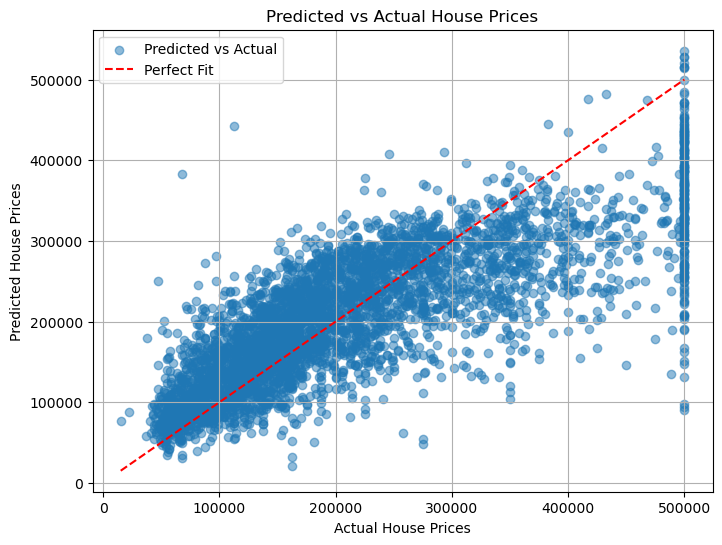

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Predicted vs Actual House Prices")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()